In [1]:
#importing dependencies
import pandas as Pd 
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path_historic="Resources/fdp-beta-state-historical (1).csv"
csv_file_historic=Pd.read_csv(csv_path_historic,encoding='cp1252')

In [4]:
csv_file_historic


,Variable,Year,Value,RSE,State,Industry
0,AI stud fees and herd testing ($),1990,200.0,118.0,New South Wales,All Broadacre
1,Accounting services ($),1990,2620.0,7.0,New South Wales,All Broadacre
2,Advisory services ($),1990,180.0,105.0,New South Wales,All Broadacre
3,Age of owner manager (yrs),1990,55.0,2.0,New South Wales,All Broadacre
4,Age of spouse (yrs),1990,52.0,2.0,New South Wales,All Broadacre
...,...,...,...,...,...,...
184255,Wheat receipts ($),2022,0.0,NaN,Western Australia,Sheep-Beef
184256,Wheat sold (t),2022,0.0,NaN,Western Australia,Sheep-Beef
184257,Wool cut per head (kg),2022,3.6,5.0,Western Australia,Sheep-Beef
184258,Wool produced (kg),2022,9302.0,16.0,Western Australia,Sheep-Beef


In [23]:
wheat_sold=csv_file_historic.loc[(csv_file_historic['Variable']=='Wheat sold (t)'),:]
wheat_produced=csv_file_historic.loc[(csv_file_historic['Variable']=='Wheat produced (t)'),:]
wheat_sold_df=wheat_sold[['Variable','Year','Value','State']]

wheat_sold_df=wheat_sold_df.rename(columns={'Value':'sold(t)'})
#wheat_sold_df['Kt']=wheat_sold_df['Kt']/2
wheat_sold_df=wheat_sold_df.reset_index().drop(['index','Variable'],axis=1)
wheat_sold_df


,Year,sold(t),State
0,1990,126.0,New South Wales
1,1990,4.0,New South Wales
2,1990,690.0,New South Wales
3,1990,291.0,New South Wales
4,1990,26.0,New South Wales
...,...,...,...
1213,2022,1.0,Western Australia
1214,2022,6789.0,Western Australia
1215,2022,1238.0,Western Australia
1216,2022,99.0,Western Australia


In [24]:
#wheat_sold=csv_file_historic.loc[(csv_file_historic['Variable']=='Wheat sold (t)'),:]
wheat_produced=csv_file_historic.loc[(csv_file_historic['Variable']=='Wheat produced (t)'),:]
wheat_produced_df=wheat_produced[['Variable','Year','Value']]

wheat_produced_df=wheat_produced_df.rename(columns={'Value':'produced(t)'})
#wheat_produced_df['Kt']=wheat_sold_df['Kt']/2
wheat_produced_df=wheat_produced_df.reset_index().drop(['index','Variable'],axis=1)
wheat_produced_df

,Year,produced(t)
0,1990,124.0
1,1990,4.0
2,1990,651.0
3,1990,296.0
4,1990,22.0
...,...,...
1213,2022,2.0
1214,2022,7230.0
1215,2022,1353.0
1216,2022,99.0


In [46]:
data_df=Pd.merge(wheat_sold_df,wheat_produced_df)
data_df['Used(t)']=data_df['produced(t)']-data_df['sold(t)']
#data_df['sold(t)']=data_df['sold(t)']/2
data_df.rename(columns={'sold(t)':'Exported(t)'})
data_df=data_df[data_df['Used(t)']>0]
data_df

,Year,sold(t),State,produced(t),Used(t)
2,1990,126.0,New South Wales,651.0,525.0
3,1990,126.0,New South Wales,296.0,170.0
10,1990,126.0,New South Wales,325.0,199.0
11,1990,126.0,New South Wales,255.0,129.0
14,1990,126.0,New South Wales,264.0,138.0
...,...,...,...,...,...
44964,2022,0.0,Western Australia,2141.0,2141.0
44965,2022,0.0,Western Australia,2.0,2.0
44966,2022,0.0,Western Australia,7230.0,7230.0
44967,2022,0.0,Western Australia,1353.0,1353.0


In [174]:
#wheat_export_df.dtypes
wheat_by_state=data_df.groupby(['State','Year']).sum()
wheat_by_state=wheat_by_state.reset_index()
wheat_by_state=wheat_by_state.rename(columns={'sold(t)':'Exported(t)'})
wheat_by_state=wheat_by_state.set_index("Year")
wheat_by_state

,State,Exported(t),produced(t),Used(t)
Year,,,,
1990,New South Wales,7407.0,32136.0,24729.0
1991,New South Wales,7876.0,33712.0,25836.0
1992,New South Wales,4970.0,25589.0,20619.0
1993,New South Wales,7128.0,36385.0,29257.0
1994,New South Wales,7461.0,35209.0,27748.0
...,...,...,...,...
2018,Western Australia,11001.0,57804.0,46803.0
2019,Western Australia,11936.0,56129.0,44193.0
2020,Western Australia,9149.0,48181.0,39032.0


In [58]:
state_data_victoria=wheat_by_state[wheat_by_state['State']=='Victoria']
state_data_2020=wheat_by_state[wheat_by_state['Year']==2020]


PLOTING PIE CHARTS FRO YEAR2010 AND 2020 TO ANALYSE THE EXPORT BY ALL STATES IN 10 YEARS

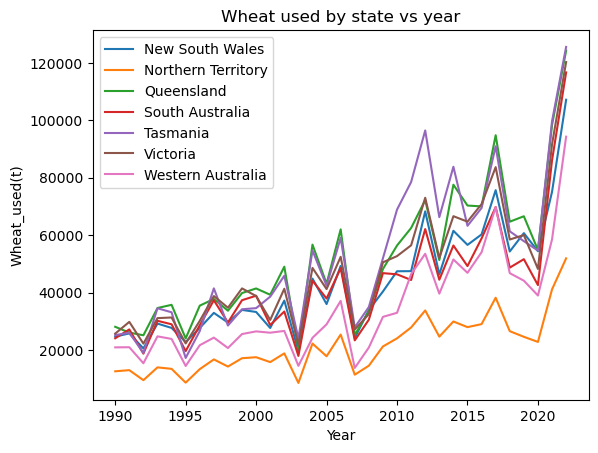

In [96]:
#fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))
#ax1.pie(state_data_2010['Used(t)'],labels=state_data_2010['State'], autopct="%1.1f%%")
#ax2.pie(state_data_2020['Used(t)'],labels=state_data_2020['State'], autopct="%1.1f%%")
#ax1.plot(state_data_victoria['Year'],state_data_victoria['Used(t)'])
#ax2.plot(state_data_victoria['Year'],state_data_victoria['Exported(t)'])
#df.set_index("year", inplace=True)

wheat_by_state.groupby("State")['Used(t)'].plot(legend=True, xlabel="Year", ylabel="Wheat_used(t)")
plt.title('Wheat used by state vs year')
plt.show()

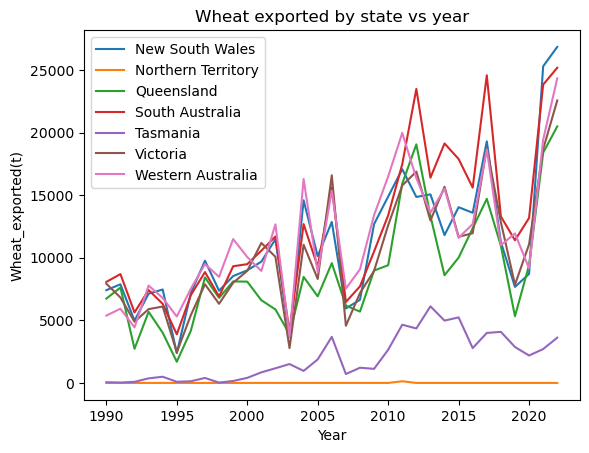

In [175]:

wheat_by_state.groupby("State")['Exported(t)'].plot(legend=True, xlabel="Year", ylabel="Wheat_exported(t)")
plt.title('Wheat exported by state vs year')
plt.show()

WHEAT EXPORT ANALYSIS

In [8]:
export_vic=avg_wheat_export_by_state.loc[avg_wheat_export_by_state['State']=='Victoria',:]
export_vic

,State,Year,Kt
165,Victoria,1990,411.5
166,Victoria,1991,308.0
167,Victoria,1992,251.0
168,Victoria,1993,499.0
169,Victoria,1994,392.5
170,Victoria,1995,155.5
171,Victoria,1996,462.5
172,Victoria,1997,408.0
173,Victoria,1998,269.5
174,Victoria,1999,326.5


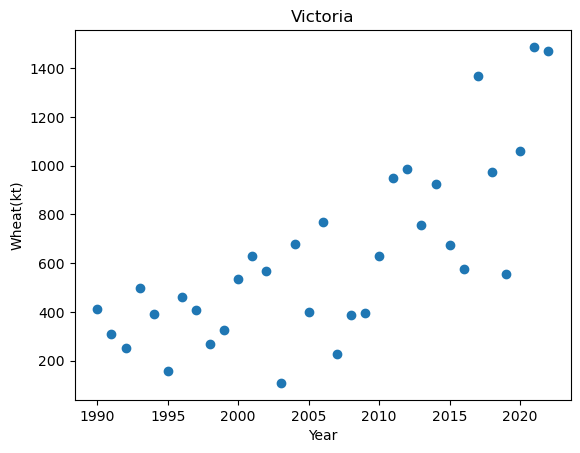

In [9]:
#export_vic=avg_wheat_export_by_state[avg_wheat_export_by_state['State']=='Victoria']['Kt']

plt.scatter(avg_wheat_export_by_state['Year'].unique(),export_vic['Kt'])
plt.title('Victoria')
plt.xlabel('Year')
plt.ylabel('Wheat(kt)')
plt.show()

In [10]:
export_vic[(export_vic['Year']>2009)&(export_vic['Year']<2021)].reset_index(drop=True)

,State,Year,Kt
0,Victoria,2010,627.5
1,Victoria,2011,950.5
2,Victoria,2012,984.5
3,Victoria,2013,755.5
4,Victoria,2014,924.0
5,Victoria,2015,675.0
6,Victoria,2016,577.5
7,Victoria,2017,1368.5
8,Victoria,2018,976.0
9,Victoria,2019,555.5
